In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

FILENAME = './data/pima-indians-diabetes.csv'
data = pd.read_csv(FILENAME, header=None, names=['a','b','c','d','e','f','g','h','S'])

D=pd.get_dummies(data,columns=["S"])
normD=(D-D.min())/(D.max()-D.min())
normD.head()

Using TensorFlow backend.


,a,b,c,d,e,f,g,h,S_0,S_1
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,0.0,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,1.0,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,0.0,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1.0,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,0.0,1.0


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(normD, test_size=0.2)
Xtrain=train.loc[:,'a':'h']
Ytrain=train.loc[:,'S_0':'S_1']
Xtest=test.loc[:,'a':'h']
Ytest=test.loc[:,'S_0':'S_1']

Xtrain

,a,b,c,d,e,f,g,h
456,0.058824,0.678392,0.442623,0.000000,0.000000,0.397914,0.260034,0.683333
585,0.058824,0.467337,0.459016,0.111111,0.000000,0.335320,0.144748,0.016667
156,0.117647,0.497487,0.426230,0.151515,0.111111,0.366617,0.238685,0.000000
14,0.294118,0.834171,0.590164,0.191919,0.206856,0.384501,0.217336,0.500000
21,0.470588,0.497487,0.688525,0.000000,0.000000,0.527571,0.132365,0.483333
699,0.235294,0.592965,0.573770,0.000000,0.000000,0.663189,0.352690,0.083333
355,0.529412,0.829146,0.721311,0.000000,0.000000,0.453055,0.095645,0.466667
430,0.117647,0.497487,0.000000,0.000000,0.000000,0.330849,0.012810,0.033333
695,0.411765,0.713568,0.737705,0.242424,0.567376,0.453055,0.021349,0.366667
422,0.000000,0.512563,0.524590,0.464646,0.092199,0.605067,0.178480,0.000000


In [45]:
model = Sequential()
model.add(Dense(6, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(2, kernel_initializer='uniform', activation='sigmoid'))

In [42]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu')) # 500 neurons
model.add(Dense(8, kernel_initializer='RandomNormal', activation='relu'))
model.add(Dense(2, kernel_initializer='uniform', activation='sigmoid')) # 1 output neuron

In [46]:



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(Xtrain, Ytrain,
                  epochs=150,
                  batch_size=5,
                  verbose=2,
                  validation_data=(Xtest, Ytest))
scores = model.evaluate(Xtest, Ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


Train on 614 samples, validate on 154 samples
Epoch 1/150
 - 0s - loss: 0.6874 - accuracy: 0.6482 - val_loss: 0.6815 - val_accuracy: 0.6494
Epoch 2/150
 - 0s - loss: 0.6742 - accuracy: 0.6515 - val_loss: 0.6672 - val_accuracy: 0.6494
Epoch 3/150
 - 0s - loss: 0.6628 - accuracy: 0.6515 - val_loss: 0.6582 - val_accuracy: 0.6494
Epoch 4/150
 - 0s - loss: 0.6559 - accuracy: 0.6515 - val_loss: 0.6529 - val_accuracy: 0.6494
Epoch 5/150
 - 0s - loss: 0.6512 - accuracy: 0.6515 - val_loss: 0.6476 - val_accuracy: 0.6494
Epoch 6/150
 - 0s - loss: 0.6467 - accuracy: 0.6515 - val_loss: 0.6414 - val_accuracy: 0.6494
Epoch 7/150
 - 0s - loss: 0.6412 - accuracy: 0.6515 - val_loss: 0.6347 - val_accuracy: 0.6494
Epoch 8/150
 - 0s - loss: 0.6367 - accuracy: 0.6515 - val_loss: 0.6276 - val_accuracy: 0.6494
Epoch 9/150
 - 0s - loss: 0.6311 - accuracy: 0.6515 - val_loss: 0.6203 - val_accuracy: 0.6494
Epoch 10/150
 - 0s - loss: 0.6254 - accuracy: 0.6515 - val_loss: 0.6122 - val_accuracy: 0.6558
Epoch 11/150


Epoch 87/150
 - 0s - loss: 0.4834 - accuracy: 0.7655 - val_loss: 0.4698 - val_accuracy: 0.7792
Epoch 88/150
 - 0s - loss: 0.4843 - accuracy: 0.7752 - val_loss: 0.4621 - val_accuracy: 0.7857
Epoch 89/150
 - 0s - loss: 0.4816 - accuracy: 0.7736 - val_loss: 0.4653 - val_accuracy: 0.7857
Epoch 90/150
 - 0s - loss: 0.4834 - accuracy: 0.7704 - val_loss: 0.4621 - val_accuracy: 0.7857
Epoch 91/150
 - 0s - loss: 0.4827 - accuracy: 0.7687 - val_loss: 0.4647 - val_accuracy: 0.7922
Epoch 92/150
 - 0s - loss: 0.4815 - accuracy: 0.7687 - val_loss: 0.4674 - val_accuracy: 0.7792
Epoch 93/150
 - 0s - loss: 0.4822 - accuracy: 0.7687 - val_loss: 0.4635 - val_accuracy: 0.7987
Epoch 94/150
 - 0s - loss: 0.4808 - accuracy: 0.7704 - val_loss: 0.4687 - val_accuracy: 0.7792
Epoch 95/150
 - 0s - loss: 0.4827 - accuracy: 0.7720 - val_loss: 0.4645 - val_accuracy: 0.7922
Epoch 96/150
 - 0s - loss: 0.4813 - accuracy: 0.7785 - val_loss: 0.4639 - val_accuracy: 0.7922
Epoch 97/150
 - 0s - loss: 0.4818 - accuracy: 0.77

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


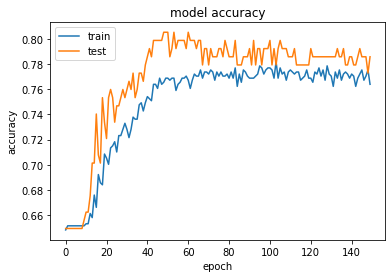

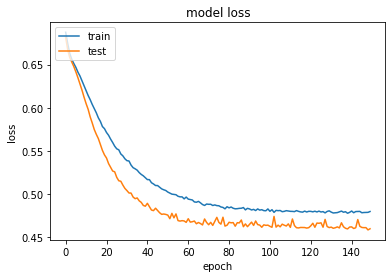

In [47]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()